
# Spaceship Titanic Submission

---

In [430]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

train_data = pd.read_csv('Data/SpaceTrain.csv')
test_data = pd.read_csv('Data/SpaceTest.csv')

train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [431]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


#### getting an idea of how many unknown values there are in each file so we can drop nulls or fill nulls accordingly

In [432]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [433]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

#### Preprocessing both train and test data, dealing categorical and numerical data separately, using a label encoder for HomePlanet, Cabin, and Desstination features
- dropping columns: Name, PassengerId
- filling columns: CryoSleep, VIP

In [434]:
def modify(data, is_test_data = False):
        if not is_test_data:
                data = data.drop(['PassengerId'], axis=1)
        data = data.drop(['Name'], axis=1)
        num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
        imputer = SimpleImputer(strategy='median')
        data[num_cols] = imputer.fit_transform(data[num_cols])
        data['CryoSleep'] = data['CryoSleep'].fillna(data['CryoSleep'].mode()[0])
        data['VIP'] = data['VIP'].fillna(data['VIP'].mode()[0])
        data['CryoSleep'] = data['CryoSleep'].astype(int)
        data['VIP'] = data['VIP'].astype(int)
        label_encoders = {}
        for col in ['HomePlanet', 'Cabin', 'Destination']:
                le = LabelEncoder()
                data[col] = le.fit_transform(data[col])
                label_encoders[col] = le
        return data


#### To see which data type I need to convert some features to in order to be better predicted by the model

In [435]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [436]:

train_data = modify(train_data)

/tmp/ipykernel_4096/2628947451.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['CryoSleep'] = data['CryoSleep'].fillna(data['CryoSleep'].mode()[0])
/tmp/ipykernel_4096/2628947451.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['VIP'] = data['VIP'].fillna(data['VIP'].mode()[0])


#### Training the data and come up with a model

In [437]:
X = train_data.drop('Transported', axis=1)
y = train_data['Transported'].astype(int)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=28)
model = RandomForestClassifier(n_estimators=250, max_depth=10, random_state= 1, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
accuracy


0.803448275862069

#### A method that allow me to get the importance relevancy number. Used a ordered bar graph to show the importance counter which provides ideas of dropping some unimportant properties and keep the important ones

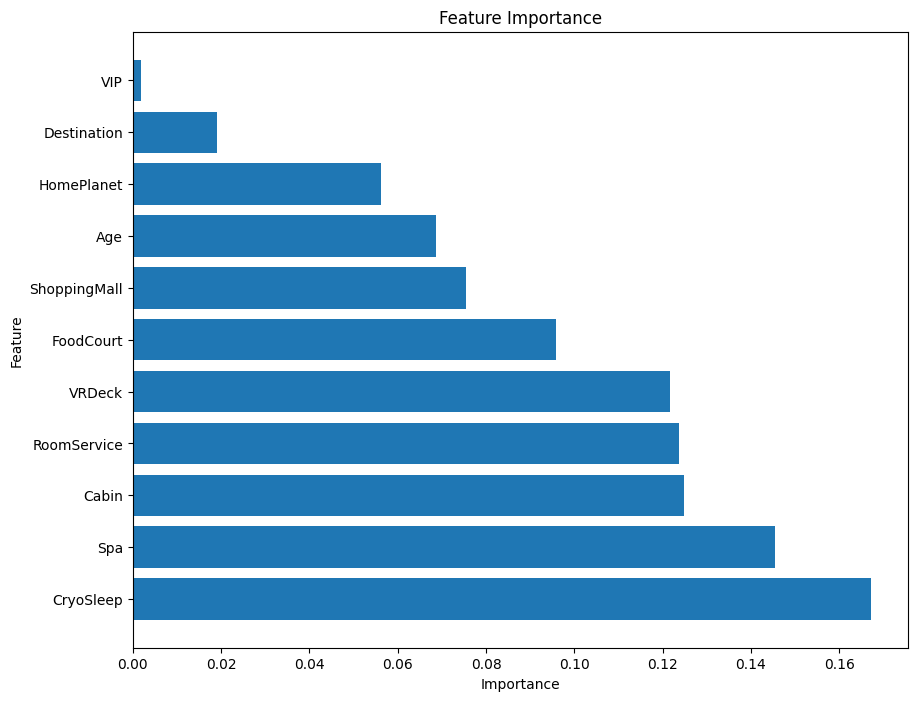

In [438]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')


plt.show()

In [439]:
importance_df

,Feature,Importance
1,CryoSleep,0.167211
9,Spa,0.145524
2,Cabin,0.124883
6,RoomService,0.123669
10,VRDeck,0.121767
7,FoodCourt,0.095767
8,ShoppingMall,0.075359
4,Age,0.068573
0,HomePlanet,0.056302
3,Destination,0.019118


*Spa is the most importance and being VIP or not has the least

In [440]:
test_data = modify(test_data, is_test_data=True)
X_test = test_data.drop(['PassengerId'], axis=1)
test_predictions = model.predict(X_test)

/tmp/ipykernel_4096/2628947451.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['CryoSleep'] = data['CryoSleep'].fillna(data['CryoSleep'].mode()[0])
/tmp/ipykernel_4096/2628947451.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['VIP'] = data['VIP'].fillna(data['VIP'].mode()[0])


In [441]:
test_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

In [442]:
output = pd.DataFrame({'PassengerId': test_data['PassengerId'],
                       'Transported': test_predictions.astype(bool)})
output

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [443]:
import time
timestr = time.strftime("%Y%m%d-%H%M%S")

output.to_csv(f'Submission/SpaceShipsubmission{timestr}.csv', index=False)